In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('global_sports_footwear_sales_2018_2026.csv')

In [3]:
df.head()

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.70,1,137.7,Card,Retail Store,Germany,Low,4.6
1,ORD100001,2026-10-05,Reebok,Model-314,Lifestyle,Men,8,Grey,80,5,76.00,3,228.0,Card,Online,USA,Low,3.9
2,ORD100002,2023-11-12,ASICS,Model-763,Lifestyle,Men,8,Black,176,15,149.60,4,598.4,Cash,Retail Store,India,Medium,3.0
3,ORD100003,2026-08-29,Reebok,Model-905,Basketball,Women,7,White,61,15,51.85,2,103.7,Card,Retail Store,India,High,3.4
4,ORD100004,2019-11-09,Nike,Model-413,Training,Men,11,Black,80,0,80.00,4,320.0,Cash,Online,USA,Medium,3.0


In [4]:
df.isnull().sum()

order_id                 0
order_date               0
brand                    0
model_name               0
category                 0
gender                   0
size                     0
color                    0
base_price_usd           0
discount_percent         0
final_price_usd          0
units_sold               0
revenue_usd              0
payment_method           0
sales_channel            0
country                  0
customer_income_level    0
customer_rating          0
dtype: int64

In [5]:
df.describe()

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  object 
 1   order_date             30000 non-null  object 
 2   brand                  30000 non-null  object 
 3   model_name             30000 non-null  object 
 4   category               30000 non-null  object 
 5   gender                 30000 non-null  object 
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  object 
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  object 
 14  sales_channel          30000 non-null  object 
 15  co

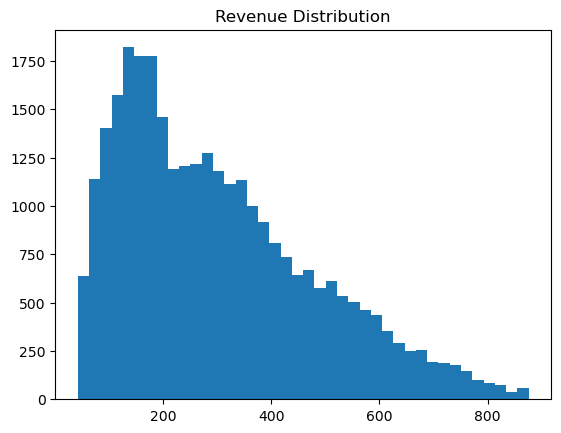

In [15]:
plt.hist(df['revenue_usd'], bins=40)
plt.title("Revenue Distribution")
plt.show()

In [16]:
df = df.drop(['order_id', 'model_name'], axis=1)

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df = df.drop('order_date', axis=1)

In [18]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [21]:
X = df.drop('revenue_usd', axis=1)
y = df['revenue_usd']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("R2 Score:", r2)

MAE: 0.015291833333418698
R2 Score: 0.999999947509754
